<a href="https://colab.research.google.com/github/medha-hegde/master_thesis/blob/main/thesis_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Clone Repo
import os

if not os.path.exists("master_thesis"):
  !git clone https://github.com/medha-hegde/master_thesis.git

Cloning into 'master_thesis'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 115 (delta 46), reused 74 (delta 26), pack-reused 0
Receiving objects: 100% (115/115), 4.94 MiB | 4.58 MiB/s, done.
Resolving deltas: 100% (46/46), done.


In [ ]:
#@title Install Dependencies and Restart Runtime
%cd /content/
!pip install -r master_thesis/requirements.txt -qq

import os
os.kill(os.getpid(), 9)

/content


In [1]:
#@title Run Preliminary Experiment

%cd '/content/master_thesis/preliminary experiments'
# !cp '/content/master_thesis/preliminary experiments/prelim_exp.py' .
# !cp '/content/master_thesis/preliminary experiments/prelim_helpers.py' .

exp_name = "experiment 1" #@param ["experiment 1", "experiment 2", "experiment 3", "experiment 4"] {allow-input: true}

from prelim_exp import run_prelim_exp
run_prelim_exp(exp_name)

/content/master_thesis/preliminary experiments
cp: '/content/master_thesis/preliminary experiments/prelim_exp.py' and './prelim_exp.py' are the same file
cp: '/content/master_thesis/preliminary experiments/prelim_helpers.py' and './prelim_helpers.py' are the same file
Created 0 images.
Created 500 images.
Created 1000 images.
Created 1500 images.
Created 2000 images.
Created 2500 images.
Created 3000 images.
Created 3500 images.
Created 4000 images.
Created 4500 images.
Created 5000 images.
Created 5500 images.
Created 6000 images.
Created 6500 images.
Created 7000 images.
Created 7500 images.
Created 8000 images.
Created 8500 images.
Created 9000 images.
Created 9500 images.
Saved 20000 files in folder: experiment 1
The number of samples has been estimated to be 10000
Starting the worker
dataset is 12
Starting work on task 0


100%|███████████████████████████████████████| 354M/354M [00:06<00:00, 51.0MiB/s]


warming up with batch size 256 on cuda
done warming up in 6.36595892906189s


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Saved CLIP embeddings in folder: clip_emb_experiment 1
Calculating Similarity Scores!


Plot for experiment 1 saved as experiment 1.png. 


In [2]:
#@title Run Character Probe Experiment
model_card = "openai/clip-vit-large-patch14" #@param ["openai/clip-vit-base-patch32", "openai/clip-vit-large-patch14", "t5-base", "t5-large"] {allow-input: true}
# device = "gpu"

%cd '/content/master_thesis/character-probe'

import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

# Replace model name in params file
# Read in the file
with open('params.py', 'r') as file :
  filedata = file.read()

# Replace the target string

for model_name in ["openai/clip-vit-base-patch32", "openai/clip-vit-large-patch16", "t5-base", "t5-large"]:
  if model_name in filedata:
      filedata = filedata.replace( model_name,model_card)

# Write the file out again
with open('params.py', 'w') as file:
  file.write(filedata)

!python3 train.py 

/content/master_thesis/character-probe


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


['<', 'h', '/', 'e', 'g', 'j', 'q', 'd', 'v', 'k', 'l', 'y', 'x', 'n', 'i', 'm', 'p', 'b', 'o', 'f', 't', 's', 'a', 'u', 'w', '>', 'c', 'r', 'z']
Len Char Vocab: 29
a :Datasets of Sizes: 33556 8012
b :Datasets of Sizes: 8348 2000
c :Datasets of Sizes: 16178 4124
d :Datasets of Sizes: 14290 3532
e :Datasets of Sizes: 35646 8838
f :Datasets of Sizes: 5924 1492
g :Datasets of Sizes: 10818 2772
h :Datasets of Sizes: 11734 3056
i :Datasets of Sizes: 28602 7196
j :Datasets of Sizes: 1626 422
k :Datasets of Sizes: 5614 1408
l :Datasets of Sizes: 19178 4836
m :Datasets of Sizes: 12556 3208
n :Datasets of Sizes: 25854 6368
o :Datasets of Sizes: 23670 6062
p :Datasets of Sizes: 10952 2744
q :Datasets of Sizes: 782 178
r :Datasets of Sizes: 28048 6886
s :Datasets of Sizes: 25738 6462
t :Datasets of Sizes: 23700 5786
u :Datasets of Sizes: 12884 3310
v :Datasets of Sizes: 5156 1176
w :Datasets of Sizes: 5044 1242
x :Datasets of Sizes: 1476 382
y :Datasets of Sizes: 7608 1834
z :Datasets of Sizes: 1

## Main Experiments

In [ ]:
text_encoder_name = "openai/clip-vit-large-patch14" #@param ["openai/clip-vit-base-patch32", "openai/clip-vit-large-patch14", "t5-small", "t5-base","google/byt5-small","google/byt5-base"] {allow-input: true}
epochs = 150 #@param {type:"number"}
combine_with_text_encoder = "None" #@param ["None","openai/clip-vit-base-patch32", "openai/clip-vit-large-patch14", "t5-small", "t5-base","google/byt5-small","google/byt5-base"] {allow-input: true}

# W&B Configs

import wandb
config = {
  "pretrained_model_name_or_path" : text_encoder_name,
   "pretrained_model_name_or_path_2" : combine_with_text_encoder,
    "textmodel_maxtokens" : 77,
    "text_prompt" : "a black and white image of the word",
    "img_size" : 64,
    "sample_batch_size" : 64,
    "dummy_run": False,
    "batch_size": 128,
    "model_name" :"transformer",
    "model_save_path" : "/content/",
    "checkpoint" : None,
    "lr" : 10e-4,
    "epochs" : epochs,
    "device" : "cuda"

}
config["run_name"] = config["pretrained_model_name_or_path"].replace("/","_")


%cd '/content/master_thesis'

from main_experiments.create_imgs import create_imgs
from main_experiments.text_model import load_text_model
from main_experiments.create_torch_dataset import create_torch_dataset
from main_experiments.unet_setup import UNet_SD, marginal_prob_std_fn, get_n_params
import torch

# Create Training Image-Text Dataset
# create_imgs(config)

# Load Text Model + tokenizer
tokenizer, text_encoder = load_text_model(config["pretrained_model_name_or_path"])
config["text_emb_length"]  = list(text_encoder.named_parameters())[0][1].shape[1]
config["text_emb_length_2"]  = 0

if combine_with_text_encoder != "None":
  tokenizer_2, text_encoder_2 = load_text_model(config["pretrained_model_name_or_path_2"])
  config["text_emb_length_2"]  = list(text_encoder_2.named_parameters())[0][1].shape[1]


# Create torch dataset
if combine_with_text_encoder == "None":
  train_dataloader = create_torch_dataset(config, tokenizer)
else:
  train_dataloader = create_torch_dataset(config, tokenizer, tokenizer_2)



# Load U-Net model
device = "cuda"
context_dim = config["text_emb_length"] + config["text_emb_length_2"] 

score_model = torch.nn.DataParallel(UNet_SD(marginal_prob_std=marginal_prob_std_fn,context_dim=context_dim))
score_model = score_model.to(device)
config["no_of_params"] = get_n_params(score_model)

# Run Training 

if config["checkpoint"] is not None:
  checkpoint = torch.load(config["checkpoint"], map_location=device)
else:
  checkpoint = None


wandb.init(project="text-encoder-experiments_testing",name = config["run_name"])
wandb.config.update(config)

from main_experiments.train import train_diffusion_model
  
train_diffusion_model(config,
                      train_dataloader,
                      score_model,
                      tokenizer,
                      text_encoder,
                      tokenizer_2=tokenizer_2 if combine_with_text_encoder != "None" else None,
                      text_encoder_2=text_encoder_2 if combine_with_text_encoder != "None" else None,
                      n_epochs =  config["epochs"],
                      lr=config["lr"],
                      model_name=config["model_name"],
                      checkpoint = checkpoint,
                      model_save_path=config["model_save_path"],
                      dummy_run=config["dummy_run"])

wandb.finish()

/content/master_thesis
Loading Model openai/clip-vit-base-patch32


Some weights of the model checkpoint at openai/clip-vit-base-patch32 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.4.mlp.fc2.weight', 'vision_model.encoder.layers.1.self_attn.q_proj.weight', 'vision_model.encoder.layers.0.layer_norm2.weight', 'vision_model.encoder.layers.3.mlp.fc1.bias', 'vision_model.encoder.layers.6.self_attn.v_proj.bias', 'vision_model.encoder.layers.9.self_attn.q_proj.bias', 'vision_model.encoder.layers.0.self_attn.q_proj.bias', 'vision_model.encoder.layers.1.mlp.fc1.bias', 'vision_model.encoder.layers.11.mlp.fc1.bias', 'vision_model.encoder.layers.10.layer_norm2.bias', 'vision_model.encoder.layers.8.mlp.fc1.weight', 'vision_model.encoder.layers.4.self_attn.out_proj.bias', 'vision_model.encoder.layers.3.mlp.fc2.bias', 'vision_model.encoder.layers.10.mlp.fc1.weight', 'vision_model.embeddings.class_embedding', 'vision_model.encoder.layers.10.mlp.fc2.weight', 'vision_model.encoder.layers.11.mlp.fc2.weight', 'vision_model.encoder.layers.7

Loading Model t5-small


Some weights of the model checkpoint at t5-small were not used when initializing T5EncoderModel: ['decoder.block.3.layer.2.DenseReluDense.wi.weight', 'decoder.block.0.layer.0.SelfAttention.relative_attention_bias.weight', 'decoder.final_layer_norm.weight', 'decoder.block.1.layer.2.layer_norm.weight', 'decoder.block.0.layer.1.layer_norm.weight', 'decoder.block.2.layer.1.EncDecAttention.k.weight', 'decoder.block.4.layer.0.SelfAttention.q.weight', 'decoder.block.5.layer.2.DenseReluDense.wi.weight', 'decoder.block.2.layer.1.EncDecAttention.o.weight', 'decoder.block.4.layer.2.layer_norm.weight', 'decoder.block.3.layer.1.EncDecAttention.q.weight', 'decoder.block.4.layer.0.layer_norm.weight', 'decoder.block.4.layer.2.DenseReluDense.wi.weight', 'decoder.block.5.layer.1.EncDecAttention.q.weight', 'decoder.block.3.layer.0.layer_norm.weight', 'decoder.block.3.layer.0.SelfAttention.v.weight', 'decoder.block.1.layer.1.layer_norm.weight', 'decoder.block.1.layer.2.DenseReluDense.wi.weight', 'decoder.

/content/master_thesis/main_experiments/unet_setup.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.tensor(t, device=device)


  0%|          | 0/250 [00:00<?, ?it/s]

/content/master_thesis/main_experiments/unet_setup.py:72: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(sigma ** t, device=device)


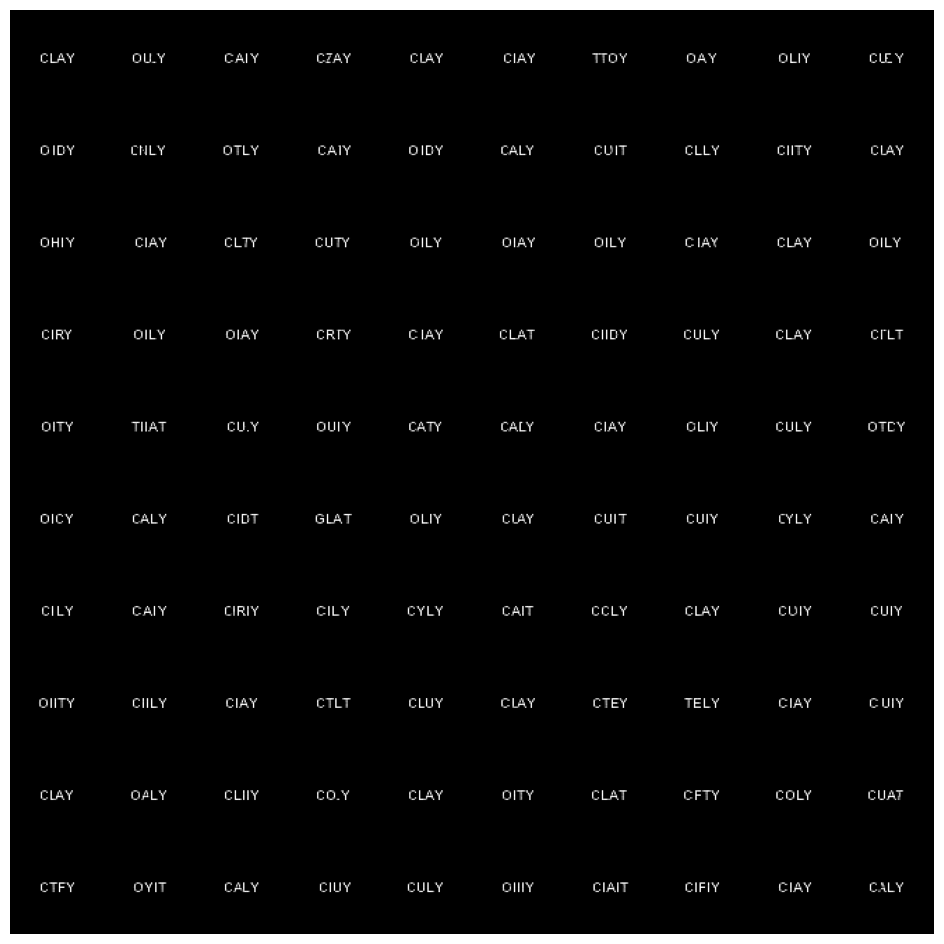

openai/clip-vit-base-patch32 0 : EasyOCR Exact Matches for word CITY: 0.0


  0%|          | 0/250 [00:00<?, ?it/s]

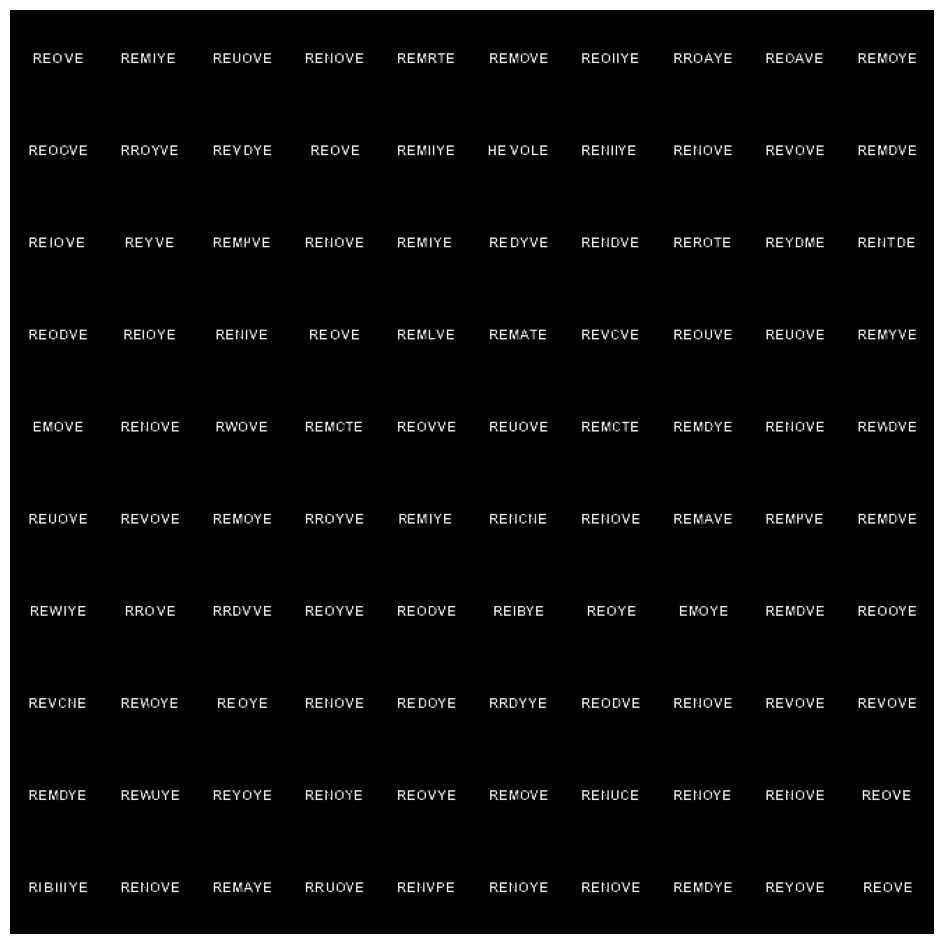

openai/clip-vit-base-patch32 1 : EasyOCR Exact Matches for word REMOVE: 0.0


  0%|          | 0/250 [00:00<?, ?it/s]

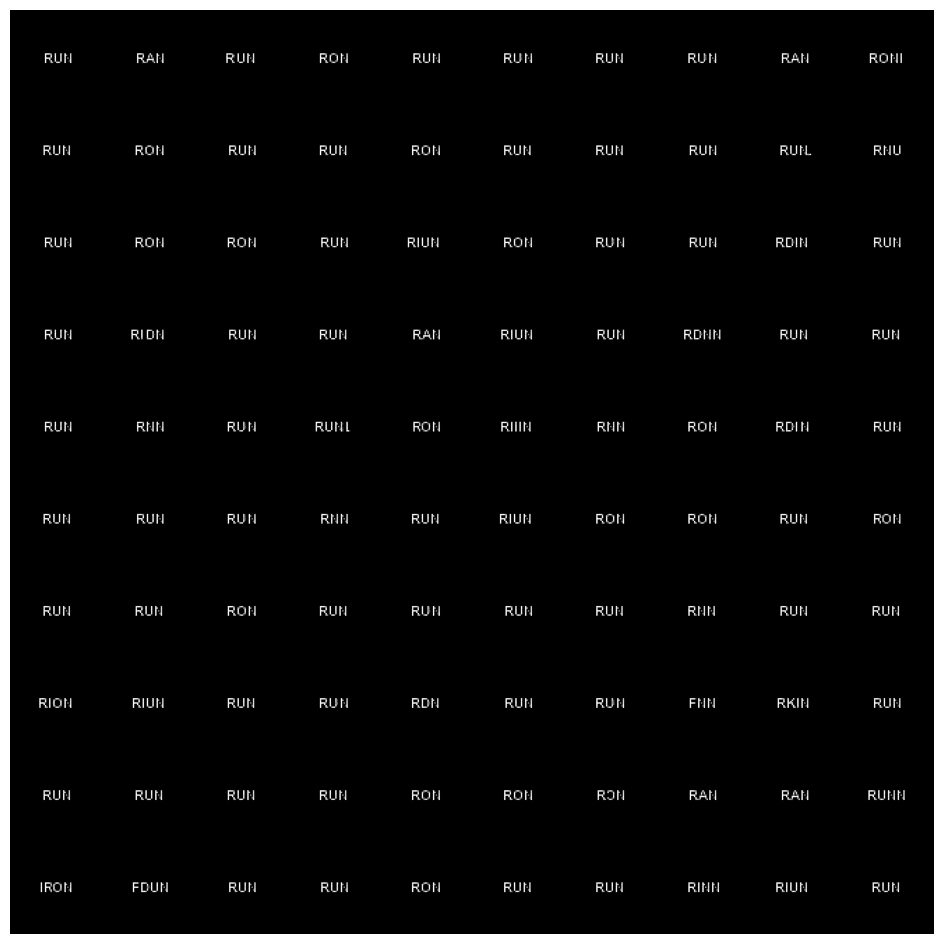

openai/clip-vit-base-patch32 2 : EasyOCR Exact Matches for word RUN: 53.0


  0%|          | 0/250 [00:00<?, ?it/s]

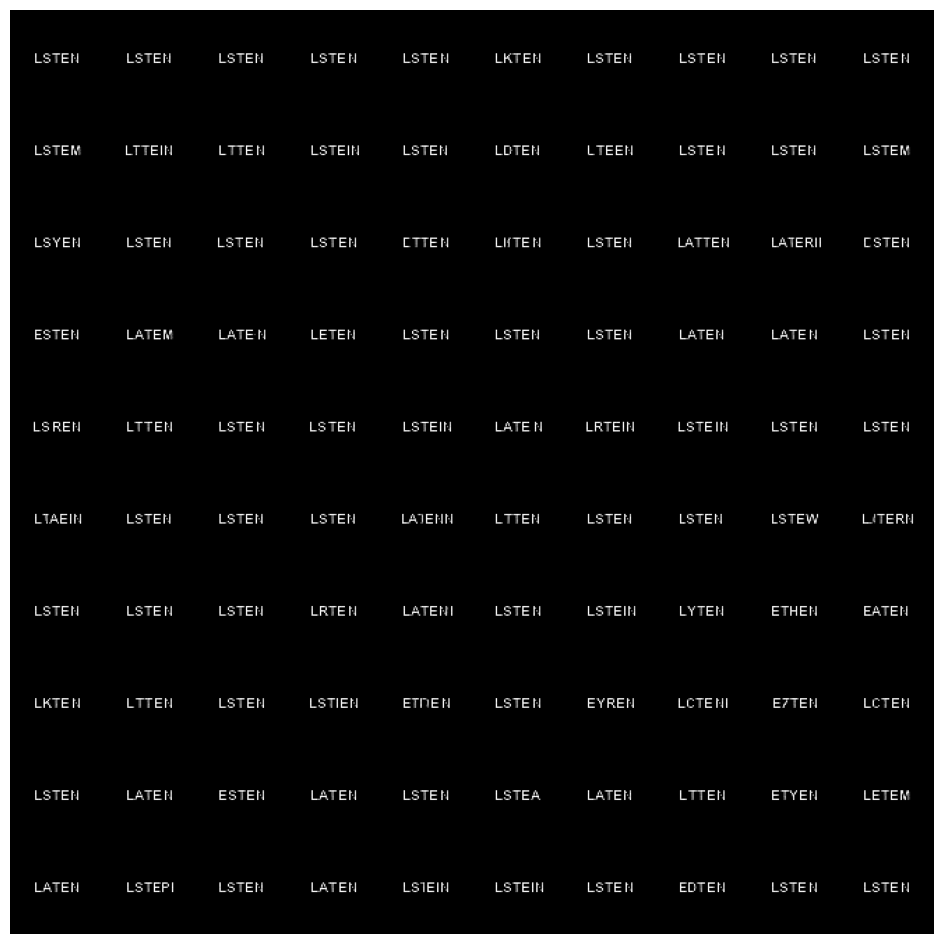

openai/clip-vit-base-patch32 3 : EasyOCR Exact Matches for word LISTEN: 0.0


  0%|          | 0/250 [00:00<?, ?it/s]

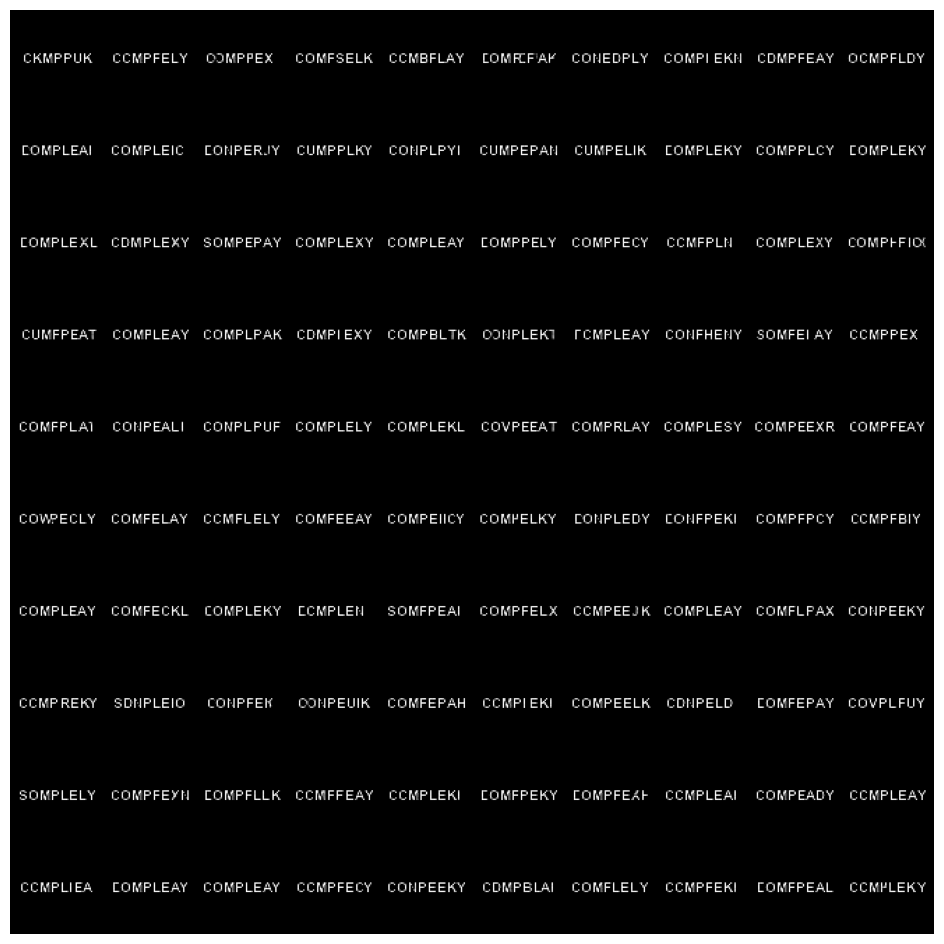

openai/clip-vit-base-patch32 4 : EasyOCR Exact Matches for word COMPLEX: 0.0


  0%|          | 0/250 [00:00<?, ?it/s]

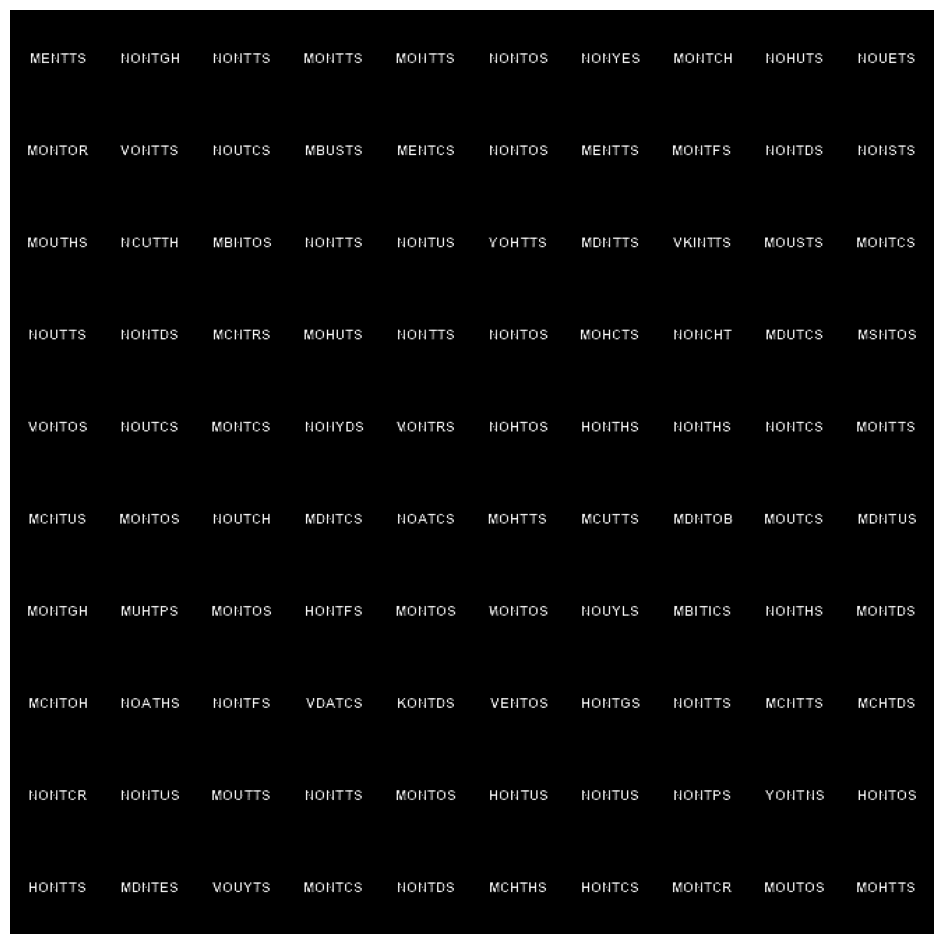

openai/clip-vit-base-patch32 5 : EasyOCR Exact Matches for word MONTHS: 0.0


  0%|          | 0/250 [00:00<?, ?it/s]

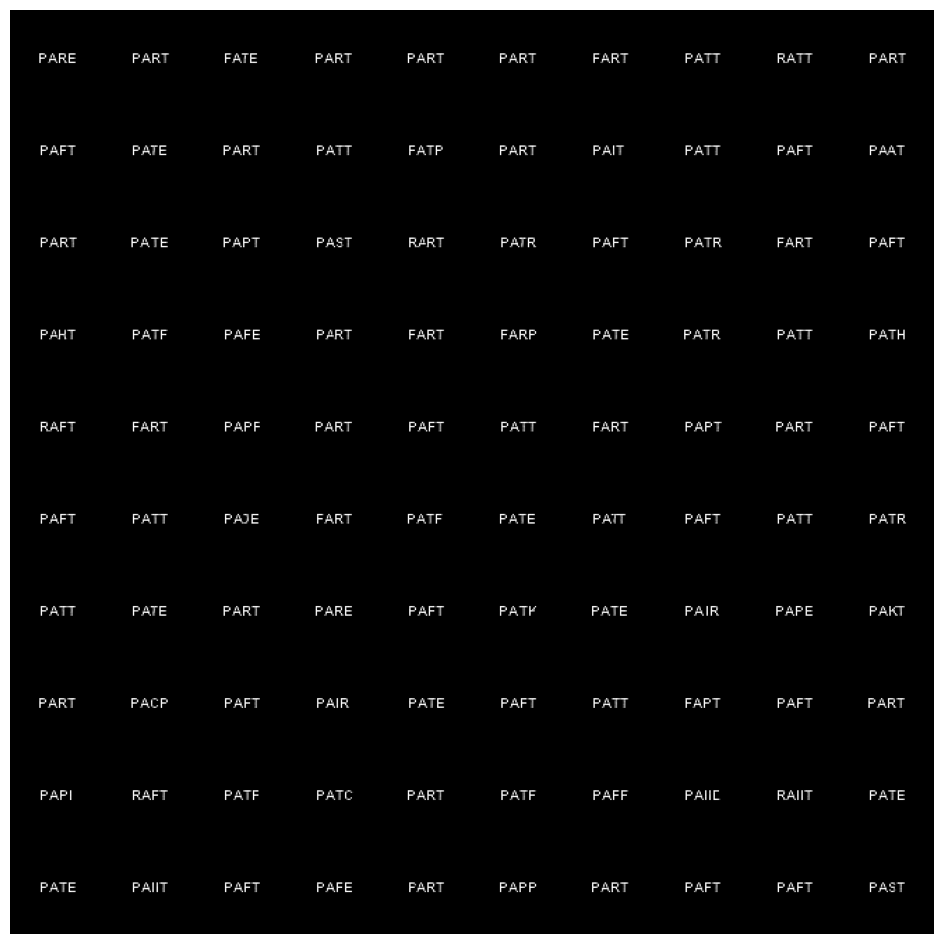

openai/clip-vit-base-patch32 6 : EasyOCR Exact Matches for word PART: 16.0


  0%|          | 0/250 [00:00<?, ?it/s]

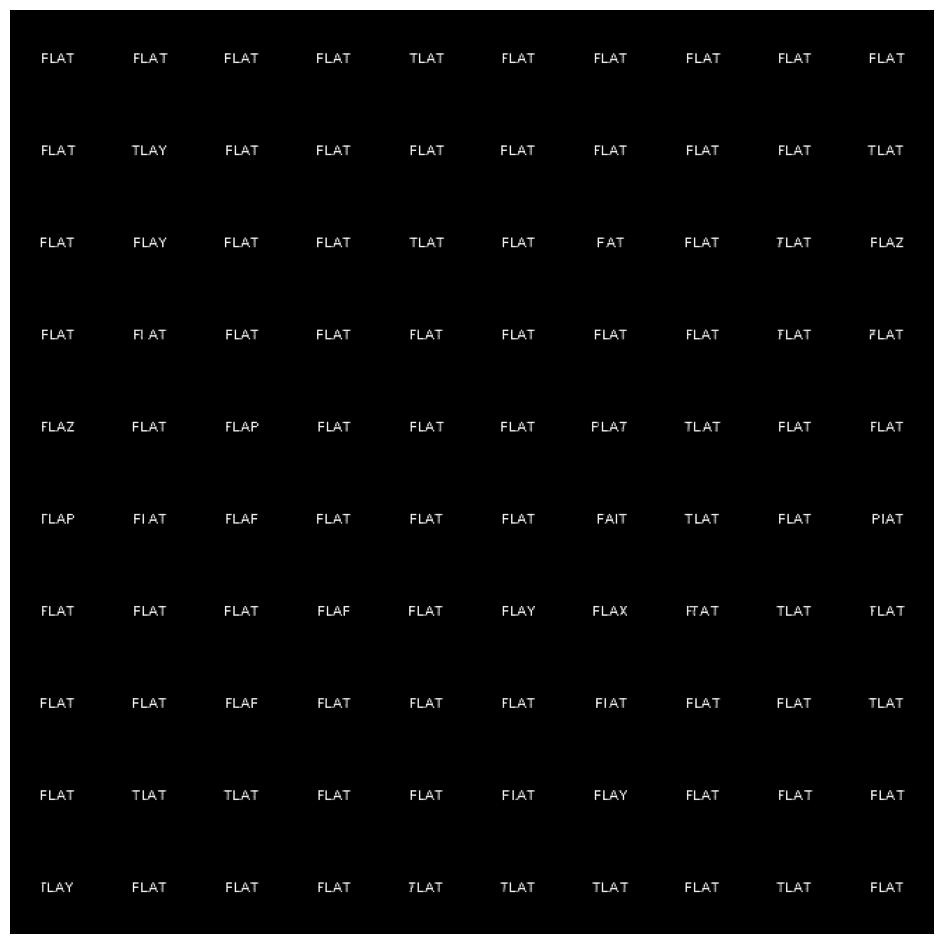

openai/clip-vit-base-patch32 7 : EasyOCR Exact Matches for word FLAT: 62.0


  0%|          | 0/250 [00:00<?, ?it/s]

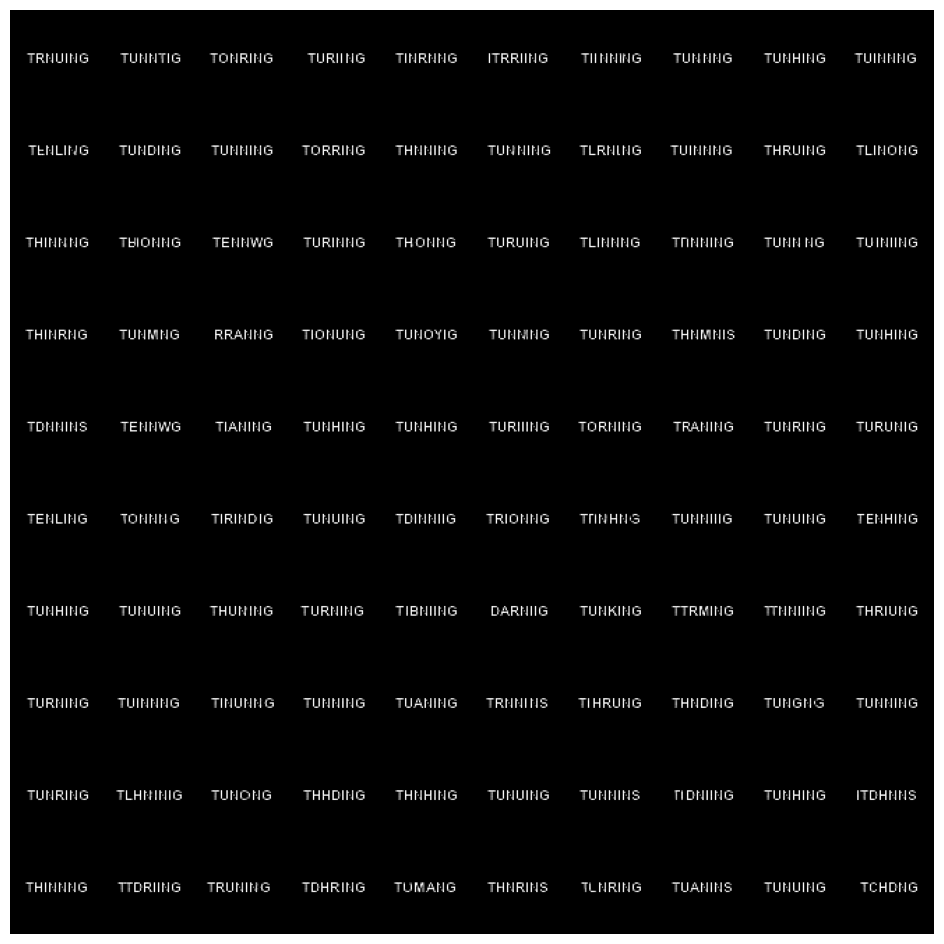

openai/clip-vit-base-patch32 8 : EasyOCR Exact Matches for word TURNING: 2.0


  0%|          | 0/250 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [1]:
#@title Run OCR
model_name = "CLIP_small" #@param 
model_saved_path = "/content/ckpt_transformer_clip_t5.pt" #@param 
text_encoder_name = "openai/clip-vit-base-patch32" #@param ["openai/clip-vit-base-patch32", "openai/clip-vit-large-patch14", "t5-small", "t5-base","google/byt5-small","google/byt5-base"] {allow-input: true}
combine_with_text_encoder = "None" #@param ["None","openai/clip-vit-base-patch32", "openai/clip-vit-large-patch14", "t5-small", "t5-base","google/byt5-small","google/byt5-base"] {allow-input: true}


ocr_configs = {"model_name" : model_name,
              "model_card" : text_encoder_name,
               "pretrained_model_name_or_path_2" : combine_with_text_encoder,
                "model_saved_path" : model_saved_path,
              "textmodel_maxtokens" : 77,
              "device" : "cuda"}

%cd '/content/master_thesis'
from main_experiments.ocr import run_ocr

run_ocr(ocr_configs)

In [4]:
%cd '/content/master_thesis'
!unzip /content/Archive.zip

/content/master_thesis
Archive:  /content/Archive.zip
  inflating: small_ocr_resultsByT5.json  
  inflating: __MACOSX/._small_ocr_resultsByT5.json  
  inflating: small_ocr_resultsCLIP.json  
  inflating: __MACOSX/._small_ocr_resultsCLIP.json  
  inflating: small_ocr_resultsT5.json  
  inflating: __MACOSX/._small_ocr_resultsT5.json  


In [5]:
#@title Plot OCR Results
model_1_name =  'CLIP' #@param 
model_2_name = 'T5' #@param 
model_3_name = 'ByT5' #@param 

model_1_saved_path = "small_ocr_resultsCLIP.json" #@param 
model_2_saved_path = "small_ocr_resultsT5.json" #@param 
model_3_saved_path = "small_ocr_resultsByT5.json" #@param 

ocr_plot_configs = {"model_names" : [model_1_name,model_2_name,model_3_name],
                    "model_paths" : [model_1_saved_path,model_2_saved_path,model_3_saved_path]
}

%cd '/content/master_thesis'
from main_experiments.ocr import ocr_plot

ocr_plot(ocr_plot_configs)


/content/master_thesis
